# 5. Строим градиентные алгоритмы оптимизации Adam, RMSProp, Adagrad, Adadelta

In [1]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-10-15 21:50:12.688976: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-15 21:50:12.700440: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-15 21:50:12.703587: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


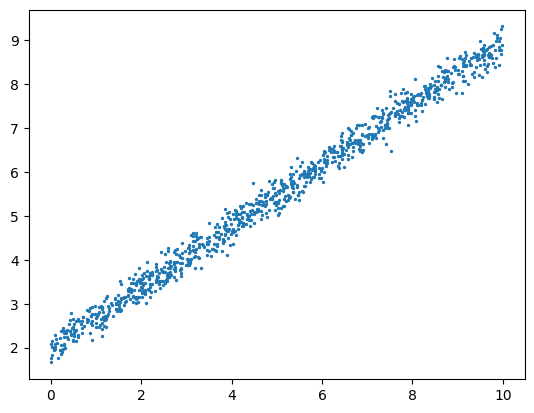

In [2]:
total_points = 1000

x = tf.random.uniform(shape = [total_points], minval=0, maxval=10)
noise = tf.random.normal(shape=[total_points], stddev=0.2)

k_true = 0.7
b_true = 2.0

y = x* k_true + b_true + noise

plt.scatter(x, y, s=2)
plt.show()

In [3]:
k = tf.Variable(0.0)
b = tf.Variable(0.0)

In [4]:
epoch = 600
learning_rate = 0.02

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.69881666>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9871598>


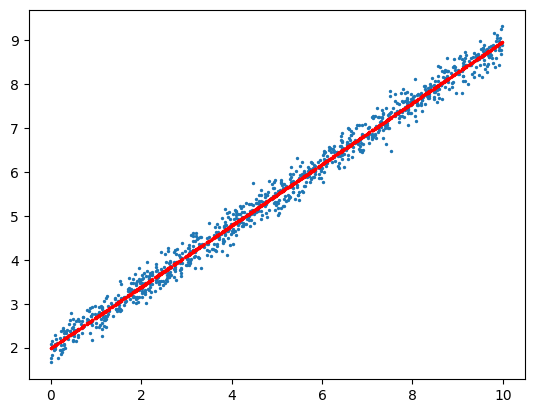

In [5]:
for n in range(epoch):
    with tf.GradientTape() as t:
        f = k*x + b
        loss = tf.reduce_mean(tf.square(y - f))
        
    dk, db = t.gradient(loss, [k, b])
    
    k.assign_sub(learning_rate * dk)
    b.assign_sub(learning_rate * db)
    
print(k, b, sep="\n")

y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)

plt.show()

#### Стохастический градиентный спуск

In [6]:
import keras

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.70937085>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9784502>


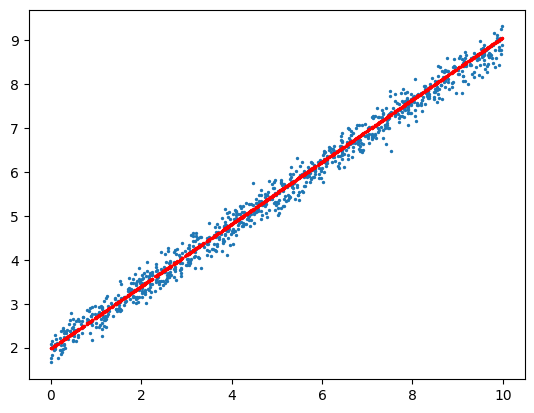

In [7]:
k = tf.Variable(0.0)
b = tf.Variable(0.0)

epoch = 50
learning_rate = 0.02

batch_size = 100
num_steps = total_points // batch_size

for n in range(epoch):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * batch_size : (n_batch+1) * batch_size]
        x_batch = x[n_batch * batch_size : (n_batch+1) * batch_size]
    
        with tf.GradientTape() as t:
            f = k*x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))
        
        dk, db = t.gradient(loss, [k, b])
    
        k.assign_sub(learning_rate * dk)
        b.assign_sub(learning_rate * db)
    
print(k, b, sep="\n")

y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)

plt.show()

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.70937085>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9784502>


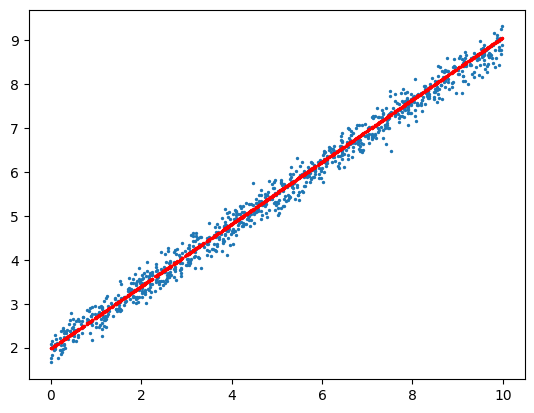

In [8]:
k = tf.Variable(0.0)
b = tf.Variable(0.0)

epoch = 50
learning_rate = 0.02

batch_size = 100
num_steps = total_points // batch_size

opt = tf.keras.optimizers.SGD(learning_rate=0.02) #алгоритм градиентного спуска

for n in range(epoch):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * batch_size : (n_batch+1) * batch_size]
        x_batch = x[n_batch * batch_size : (n_batch+1) * batch_size]
    
        with tf.GradientTape() as t:
            f = k*x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))
        
        dk, db = t.gradient(loss, [k, b])
        opt.apply_gradients(zip([dk, db], [k, b]))
        #k.assign_sub(learning_rate * dk)
        #b.assign_sub(learning_rate * db)
    
print(k, b, sep="\n")

y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)

plt.show()

#### Оптимизаторы для преодоления локального минимума

#### Метод моментов (метод импульсов)

In [9]:
opt = tf.keras.optimizers.SGD(momentum=0.5, learning_rate=0.02) #алгоритм метода импульсов

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.69964707>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9927411>


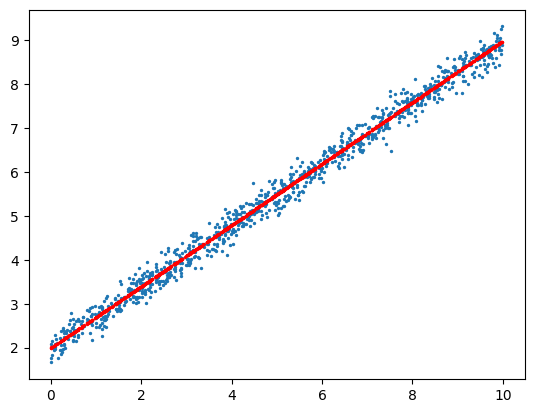

In [10]:
k = tf.Variable(0.0)
b = tf.Variable(0.0)

epoch = 50
learning_rate = 0.02

batch_size = 100
num_steps = total_points // batch_size

opt = tf.keras.optimizers.SGD(momentum=0.5, learning_rate=0.02) #алгоритм градиентного спуска

for n in range(epoch):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * batch_size : (n_batch+1) * batch_size]
        x_batch = x[n_batch * batch_size : (n_batch+1) * batch_size]
    
        with tf.GradientTape() as t:
            f = k*x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))
        
        dk, db = t.gradient(loss, [k, b])
        opt.apply_gradients(zip([dk, db], [k, b]))
        #k.assign_sub(learning_rate * dk)
        #b.assign_sub(learning_rate * db)
    
print(k, b, sep="\n")

y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)

plt.show()

#### Метод Нестерова

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7265152>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0011244>


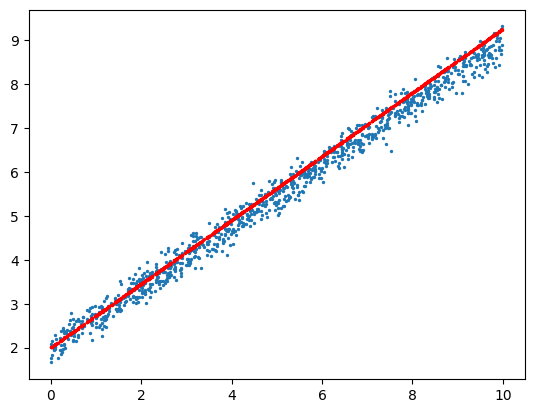

In [11]:
k = tf.Variable(0.0)
b = tf.Variable(0.0)

epoch = 50
learning_rate = 0.02

batch_size = 100
num_steps = total_points // batch_size

opt = tf.keras.optimizers.SGD(momentum=0.5,
                              nesterov=True, 
                              learning_rate=0.02) #алгоритм градиентного спуска

for n in range(epoch):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * batch_size : (n_batch+1) * batch_size]
        x_batch = x[n_batch * batch_size : (n_batch+1) * batch_size]
    
        with tf.GradientTape() as t:
            f = k*x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))
        
        dk, db = t.gradient(loss, [k, b])
        opt.apply_gradients(zip([dk, db], [k, b]))
        #k.assign_sub(learning_rate * dk)
        #b.assign_sub(learning_rate * db)
    
print(k, b, sep="\n")

y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)

plt.show()

#### Adagrad

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.6988485>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.992385>


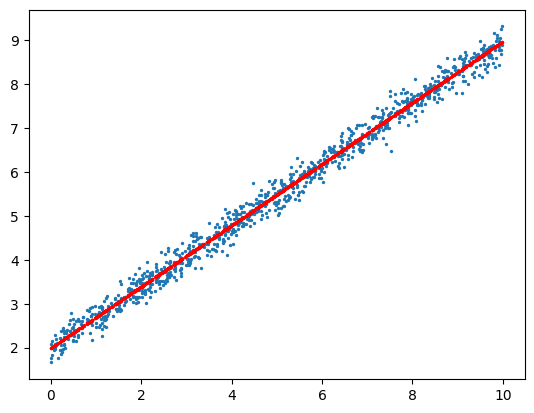

In [12]:
k = tf.Variable(0.0)
b = tf.Variable(0.0)

epoch = 50
learning_rate = 0.02

batch_size = 100
num_steps = total_points // batch_size

opt = tf.keras.optimizers.Adagrad(learning_rate=0.5) #алгоритм градиентного спуска

for n in range(epoch):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * batch_size : (n_batch+1) * batch_size]
        x_batch = x[n_batch * batch_size : (n_batch+1) * batch_size]
    
        with tf.GradientTape() as t:
            f = k*x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))
        
        dk, db = t.gradient(loss, [k, b])
        opt.apply_gradients(zip([dk, db], [k, b]))
        #k.assign_sub(learning_rate * dk)
        #b.assign_sub(learning_rate * db)
    
print(k, b, sep="\n")

y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)

plt.show()

#### Adadelta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.76165795>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.5686994>


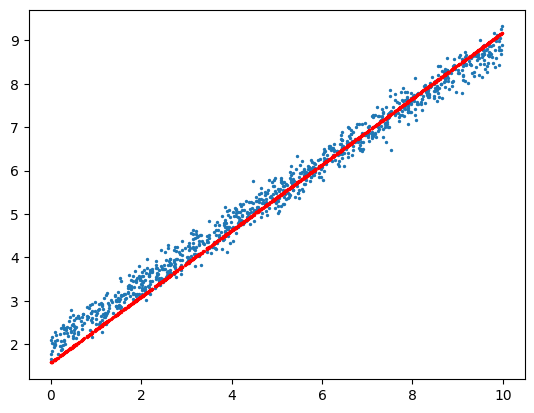

In [13]:
k = tf.Variable(0.0)
b = tf.Variable(0.0)

epoch = 50
learning_rate = 0.02

batch_size = 100
num_steps = total_points // batch_size

opt = tf.keras.optimizers.Adadelta(learning_rate=5.0) #алгоритм градиентного спуска

for n in range(epoch):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * batch_size : (n_batch+1) * batch_size]
        x_batch = x[n_batch * batch_size : (n_batch+1) * batch_size]
    
        with tf.GradientTape() as t:
            f = k*x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))
        
        dk, db = t.gradient(loss, [k, b])
        opt.apply_gradients(zip([dk, db], [k, b]))
        #k.assign_sub(learning_rate * dk)
        #b.assign_sub(learning_rate * db)
    
print(k, b, sep="\n")

y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)

plt.show()

#### RMSProp

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7044146>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9955989>


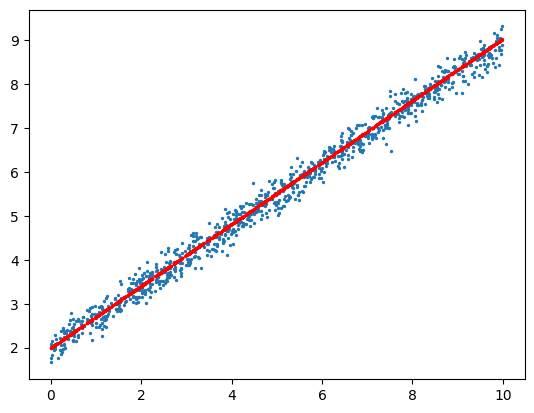

In [14]:
k = tf.Variable(0.0)
b = tf.Variable(0.0)

epoch = 50
learning_rate = 0.02

batch_size = 100
num_steps = total_points // batch_size

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01) #алгоритм градиентного спуска

for n in range(epoch):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * batch_size : (n_batch+1) * batch_size]
        x_batch = x[n_batch * batch_size : (n_batch+1) * batch_size]
    
        with tf.GradientTape() as t:
            f = k*x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))
        
        dk, db = t.gradient(loss, [k, b])
        opt.apply_gradients(zip([dk, db], [k, b]))
        #k.assign_sub(learning_rate * dk)
        #b.assign_sub(learning_rate * db)
    
print(k, b, sep="\n")

y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)

plt.show()

#### Adam

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.6965641>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9915321>


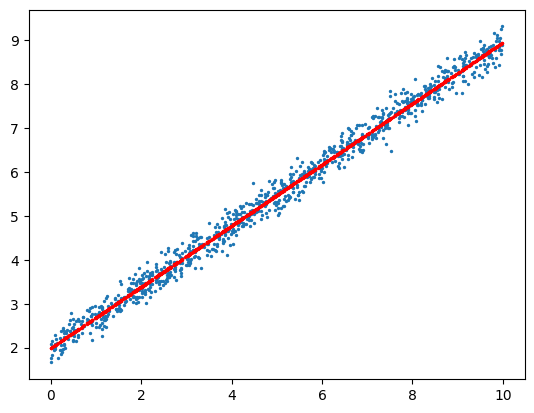

In [15]:
k = tf.Variable(0.0)
b = tf.Variable(0.0)

epoch = 50
learning_rate = 0.02

batch_size = 100
num_steps = total_points // batch_size

opt = tf.keras.optimizers.Adam(learning_rate=0.2) #алгоритм градиентного спуска

for n in range(epoch):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * batch_size : (n_batch+1) * batch_size]
        x_batch = x[n_batch * batch_size : (n_batch+1) * batch_size]
    
        with tf.GradientTape() as t:
            f = k*x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))
        
        dk, db = t.gradient(loss, [k, b])
        opt.apply_gradients(zip([dk, db], [k, b]))
        #k.assign_sub(learning_rate * dk)
        #b.assign_sub(learning_rate * db)
    
print(k, b, sep="\n")

y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)

plt.show()